Plot all the data defect correlation versus sample elasticity curves.

# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
import pickle

# Helper Functions:

In [2]:
def unstack_saved_list_of_series(list_of_list_of_series):
    unstacked_1 = [pd.concat(temp_list_of_series, ignore_index = True) for temp_list_of_series in list_of_list_of_series]
    return pd.concat(unstacked_1, axis=1).T

# Hyperparameters:

link fn to true beta series:

In [3]:
sample_size_of_interest = 1000

In [4]:
make_greyscale = True

In [5]:
if make_greyscale:
    high_contrast_greys = ['#000000', '#808080', '#C0C0C0']
    sns.set_palette(high_contrast_greys)
    savefile_suffix = '_greyscale'
else:
    sns.set_palette('deep')
    savefile_suffix = ''

### run one of the code chunks below:

In [12]:
generators_and_betas = [
    ('Logit', 1),
    ('Probit', 1),
    ('CLogLog', 1)
]
final_fig_suffix = '1_all'
true_logit_beta = 1

In [7]:
generators_and_betas = [
    ('Logit', -1),
    ('Probit', -1),
    ('CLogLog', -1)
]
final_fig_suffix = 'sans_1_all'
true_logit_beta = -1

# Read data in:

In [13]:
all_data_per_generator = {}

In [14]:
for link, true_beta in tqdm(generators_and_betas):
    pickle_filename = f"all_raw_data_{link}_{true_beta}.pickle"
    with open(pickle_filename, "rb") as handle:
        biased_sampler = pickle.load(handle)

    unstacked_values = []

    for i in tqdm(range(6)):
        unstacked_values.append(
            unstack_saved_list_of_series(biased_sampler[i][sample_size_of_interest])
        )

    values_per_link_fn = []

    for i in tqdm(range(3)):
        temp_vals = [unstacked_value[i] for unstacked_value in unstacked_values]

        val_names = [
            "jn_biased",
            "ddc_biased",
            "samp_biased",
            "jn_intended",
            "ddc_intended",
            "samp_intended",
        ]

        for i in range(6):
            temp_vals[i].name = val_names[i]
            temp_vals[i] = temp_vals[i].reset_index(drop=True)

        values_per_link_fn.append(pd.concat(temp_vals, axis=1))

    all_data_per_generator[link] = values_per_link_fn

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|                                                                                            | 0/6 [00:00<?, ?it/s]
%|██████████████                                                                      | 1/6 [00:00<00:02,  1.70it/s]
%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.58it/s]
%|██████████████████████████████████████████                                          | 3/6 [00:01<00:00,  3.11it/s]
%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  2.31it/s]
%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:03<00:00,  1.21it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.73it/s]

 33%|████████████████████████████                        

# Create Graph:

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|████████████████████████████                                                        | 1/3 [00:22<00:44, 22.31s/it]
%|████████████████████████████████████████████████████████                            | 2/3 [00:44<00:22, 22.41s/it]
 33%|████████████████████████████                                                        | 1/3 [01:09<02:18, 69.24s/it]
%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|████████████████████████████                                                        | 1/3 [00:21<00:42, 21.34s/it]
%|████████████████████████████████████████████████████████                            | 2/3 [00:43<00:21, 21.97s/it]
 67%|█████████████████████████████████████████████████████

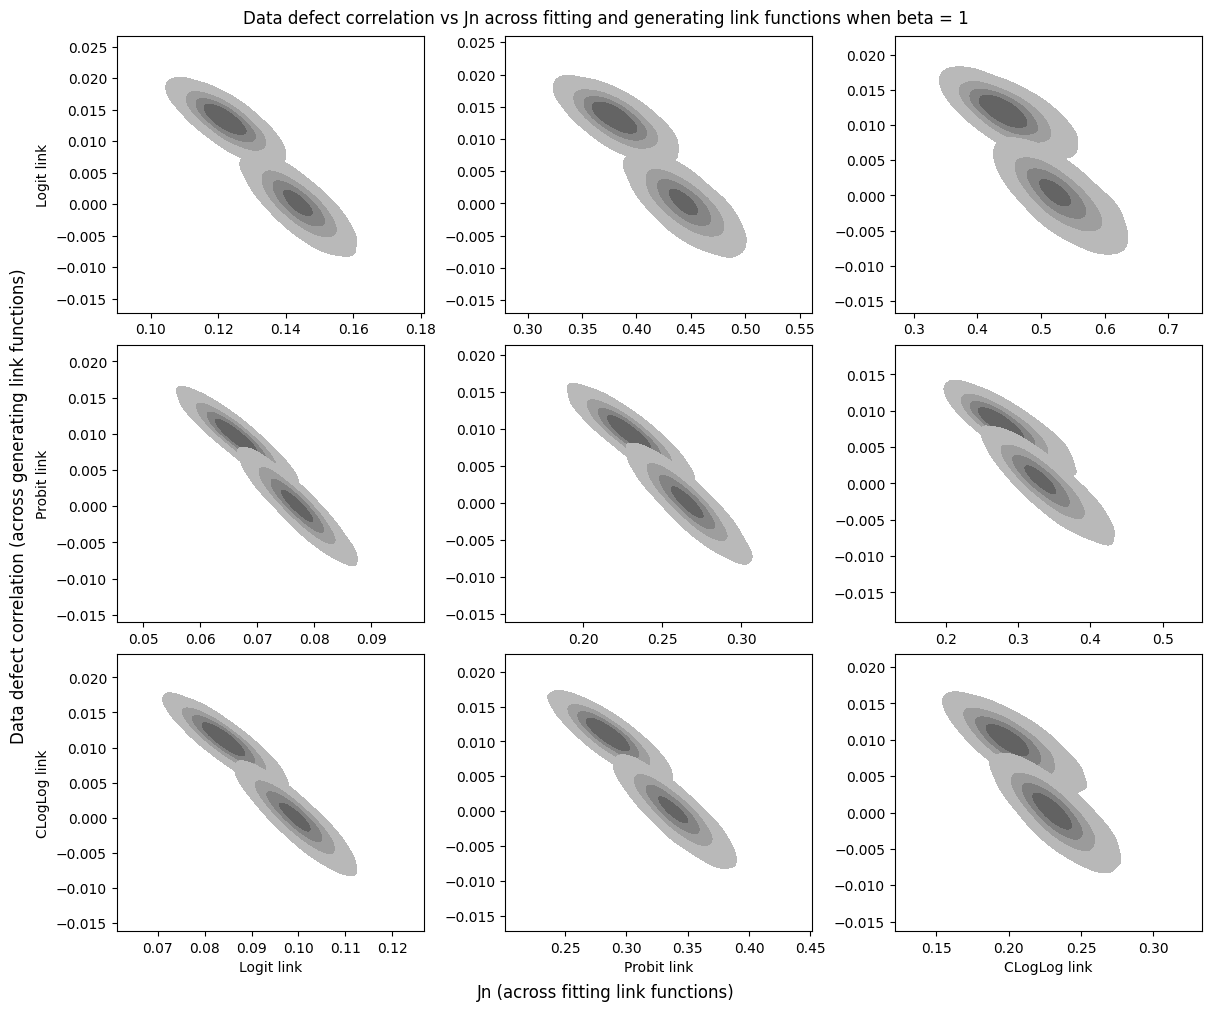

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(
    3, 3, 
    constrained_layout=True, 
    figsize=(12, 10),
    # sharex='col', 
    # sharey='row' 
)

generating_functions = ["Logit", "Probit", "CLogLog"]
for generating_fn_ix in trange(3):
    generating_function = generating_functions[generating_fn_ix]

    for link_fn in trange(3):
        ax = axes[generating_fn_ix][link_fn]
        temp_view = all_data_per_generator[generating_function][link_fn]

        c1 = temp_view[["jn_biased", "ddc_biased"]].copy()
        c1.columns = ["jn", "ddc"]
        c1["Sampling Scheme"] = "Biased"

        c2 = temp_view[["jn_intended", "ddc_intended"]].copy()
        c2.columns = ["jn", "ddc"]
        c2["Sampling Scheme"] = "Intended"

        c_agg = pd.concat([c1, c2]).reset_index(drop=True)

        sns.kdeplot(
            data=c_agg,
            x="jn",
            y="ddc",
            hue="Sampling Scheme",
            fill=True,
            bw_adjust=1.8,
            ax=ax,
            levels=5,
            legend=False,
        )

        if link_fn == 0:
            ax.set_ylabel(f"{generating_function} link")
        else:
            ax.set_ylabel("")

        if generating_fn_ix == 2:
            ax.set_xlabel(f"{generating_functions[link_fn]} link")
        else:
            ax.set_xlabel("")


fig.suptitle(
    "Data defect correlation vs Jn across "
    + f"fitting and generating link functions when beta = {true_logit_beta}"
)
fig.supxlabel("Jn (across fitting link functions)")
fig.supylabel("Data defect correlation (across generating link functions)")
plt.savefig(f"ddc_vs_sample_elasticity_{final_fig_suffix}.png")

# custom greyscale version:

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|████████████████████████████                                                        | 1/3 [00:22<00:45, 22.86s/it]
%|████████████████████████████████████████████████████████                            | 2/3 [00:45<00:22, 22.72s/it]
 33%|████████████████████████████                                                        | 1/3 [01:09<02:19, 69.51s/it]
%|                                                                                            | 0/3 [00:00<?, ?it/s]
%|████████████████████████████                                                        | 1/3 [00:21<00:42, 21.44s/it]
%|████████████████████████████████████████████████████████                            | 2/3 [00:44<00:22, 22.40s/it]
 67%|█████████████████████████████████████████████████████

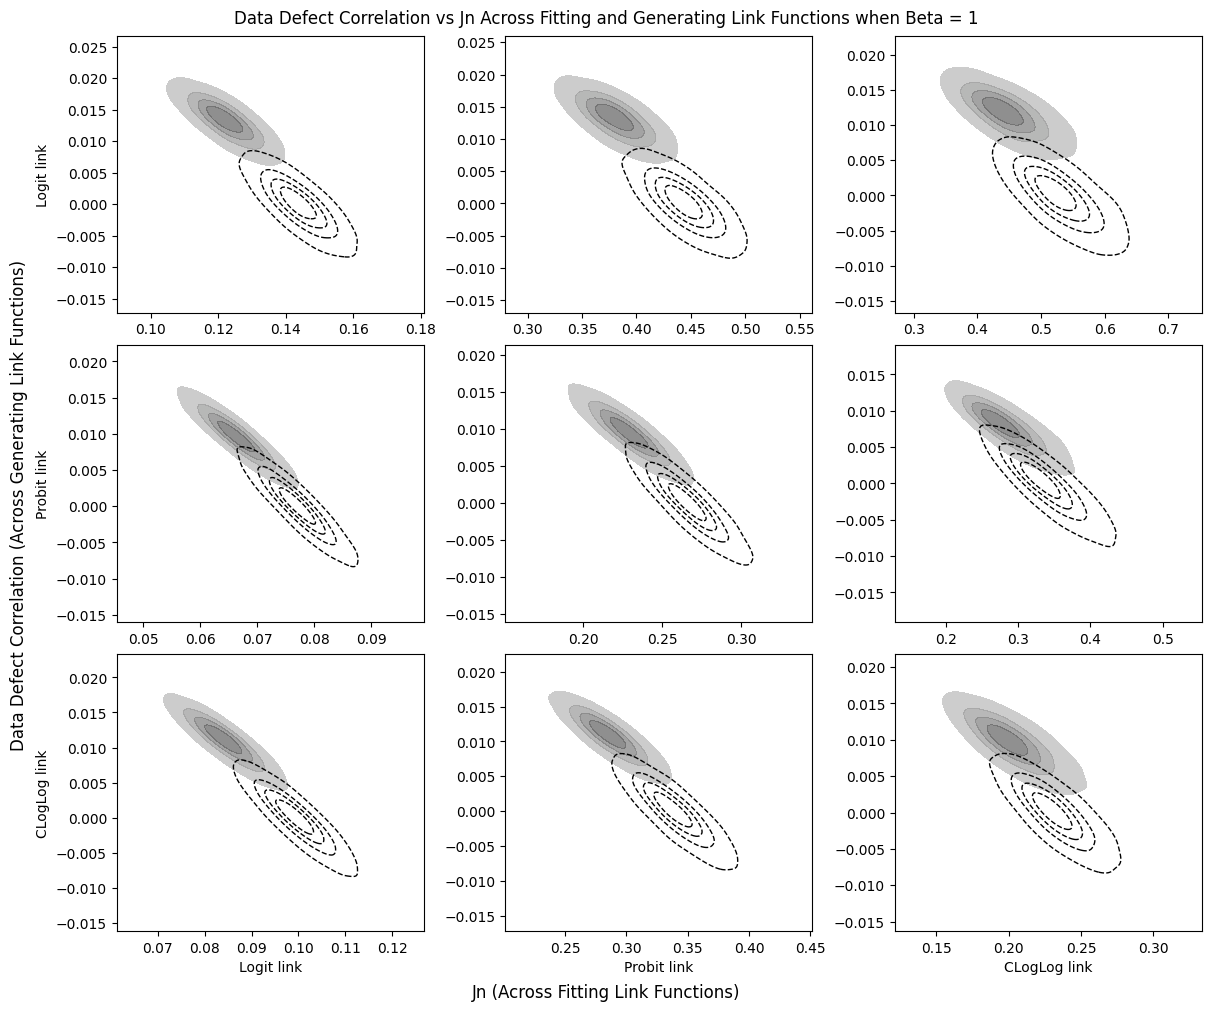

In [16]:
high_contrast_greys = ["#000000", "#808080", "#C0C0C0"]
sns.set_palette(high_contrast_greys)
savefile_suffix = "_greyscale"

# Create a figure with subplots
fig, axes = plt.subplots(
    3, 3, 
    constrained_layout=True, 
    figsize=(12, 10),
    # sharex='col', 
    # sharey='row' 
)

generating_functions = ["Logit", "Probit", "CLogLog"]
for generating_fn_ix in trange(3):
    generating_function = generating_functions[generating_fn_ix]

    for link_fn in trange(3):
        ax = axes[generating_fn_ix][link_fn]
        temp_view = all_data_per_generator[generating_function][link_fn]

        c1 = temp_view[["jn_biased", "ddc_biased"]].copy()
        c1.columns = ["jn", "ddc"]
        c1["Sampling Scheme"] = "Biased"

        c2 = temp_view[["jn_intended", "ddc_intended"]].copy()
        c2.columns = ["jn", "ddc"]
        c2["Sampling Scheme"] = "Intended"

        c_agg = pd.concat([c1, c2]).reset_index(drop=True)

        sns.kdeplot(
            data=c_agg[c_agg["Sampling Scheme"] == "Biased"],
            x="jn",
            y="ddc",
            fill=True,
            bw_adjust=1.8,
            ax=ax,
            levels=5,
            color="#404040",  # Dark grey
            alpha=0.7,
            legend=False,
        )

        # Intended sampling scheme - hatched pattern with lighter color
        sns.kdeplot(
            data=c_agg[c_agg["Sampling Scheme"] == "Intended"],
            x="jn",
            y="ddc",
            fill=False,  # No fill, just contour lines
            bw_adjust=1.8,
            ax=ax,
            levels=5,
            color="#000000",  # Black contour lines
            linewidths=1,  # Thicker lines for better visibility
            linestyles="--",  # Dashed lines for distinction
            legend=False,
        )

        if link_fn == 0:
            ax.set_ylabel(f"{generating_function} link")
        else:
            ax.set_ylabel("")

        if generating_fn_ix == 2:
            ax.set_xlabel(f"{generating_functions[link_fn]} link")
        else:
            ax.set_xlabel("")


fig.suptitle(
    "Data Defect Correlation vs Jn Across "
    + f"Fitting and Generating Link Functions when Beta = {true_logit_beta}"
)
fig.supxlabel("Jn (Across Fitting Link Functions)")
fig.supylabel("Data Defect Correlation (Across Generating Link Functions)")
plt.savefig(f"ddc_vs_sample_elasticity_{final_fig_suffix}{savefile_suffix}.png")